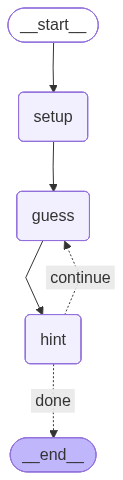

choose higher!
choose lower!
choose lower!
choose lower!
Congratulations! You've guessed the correct number!


{'name': 'morey',
 'guesses': [1, 5, 4, 3, 2],
 'attempts': 5,
 'lower_bound': 1,
 'upper_bound': 20,
 'number': 2,
 'chosen_number': 2}

In [10]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END
import random


class AgentState(TypedDict):
    name : str
    guesses: list[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    number: int
    chosen_number: int


def setup(state: AgentState) -> AgentState:
    state['attempts'] = 0
    state['number'] = random.randint(state['lower_bound'], state['upper_bound'])
    return state

def guess_node(state : AgentState) -> AgentState:
    state['chosen_number'] = input(f"Guess a number between {state['lower_bound']} and {state['upper_bound']}: ")
    state['chosen_number'] = int(state['chosen_number'])
    state['guesses'].append(state['chosen_number'])
    state['attempts'] += 1
    return state

def hint_node(state : AgentState) -> AgentState:
    return state   

def check_guess(state: AgentState) -> str:
    if(state['attempts'] > 7) :
        print(f"Sorry, you've exceeded the maximum number of attempts. The correct number was {state['number']}.")
        return "done"
    if state['chosen_number'] == state['number']:
        print("Congratulations! You've guessed the correct number!")
        return "done"
    elif state['chosen_number'] < state['number']:
        print("choose higher!")
        return "continue"
    else:
        print("choose lower!")
        return "continue"        





# greeting --> random --> random --> random --> random --> random --> END

graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)


graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint", # source node
    check_guess, # routing function (Action)
    {
        # "edge" : "node"
        "continue" : "guess",
        "done" : END
    }

)

app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

app.invoke({"name" : "morey", "guesses" : [], "attempts" : 0, "lower_bound" : 1, "upper_bound" : 20})